In [1]:
def fib():
    fibo=[]
    listo=[]
    i=1
    while len(listo)<26:
        if i==1:
            fibo.append(1)
        elif len(fibo)>2:
            fibo.append(fibo[-2]+fibo[-1])
            if (fibo[-2]+fibo[-1])>100:
                listo.append(fibo[-2]+fibo[-1])
        else:
            fibo.append(sum(fibo))
        i+=1
    return listo

In [7]:
def dictyy(listy,a):
    alpha='a b c d e f g h i j k l m n o p q r s t u v w x y z'
    alpha=alpha.split()
    dicto={}
    for i in range(len(listy)):
        dicto[alpha[i]]=listy[i]
    return dicto[a.lower()]

In [9]:
listy=fib()
dicto=dictyy(listy,'Z')
dicto

24157817

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.losses import CategoricalCrossentropy

In [31]:
from tensorflow.keras.datasets import mnist

In [34]:
(train_data, train_labels), (test_data, test_labels) =mnist.load_data('mnist')

11501568/11490434 [==============================] - 4s 0us/step


In [36]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [40]:
train_data.shape

(60000, 28, 28)

In [43]:
len(set(train_labels))

10

In [52]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
],name='basic')
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
model.fit(train_data,train_labels,epochs=100,validation_data=(test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8776 - accuracy: 0.3320 - val_loss: 1.5620 - val_accuracy: 0.4189
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3885 - accuracy: 0.4935 - val_loss: 1.2529 - val_accuracy: 0.5707
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1543 - accuracy: 0.5949 - val_loss: 1.0874 - val_accuracy: 0.6364
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0267 - accuracy: 0.6466 - val_loss: 0.9827 - val_accuracy: 0.6737
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9404 - accuracy: 0.6826 - val_loss: 0.9056 - val_accuracy: 0.7042
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8825 - accuracy: 0.7049 - val_loss: 0.8566 - val_accuracy: 0.7232
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8441 - accuracy: 0.7224 - val_loss: 0.8279 - val_ac

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4459 - accuracy: 0.8699 - val_loss: 0.4545 - val_accuracy: 0.8662
Epoch 58/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4451 - accuracy: 0.8711 - val_loss: 0.4540 - val_accuracy: 0.8675
Epoch 59/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4446 - accuracy: 0.8711 - val_loss: 0.4523 - val_accuracy: 0.8679
Epoch 60/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4436 - accuracy: 0.8719 - val_loss: 0.4513 - val_accuracy: 0.8684
Epoch 61/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4428 - accuracy: 0.8726 - val_loss: 0.4518 - val_accuracy: 0.8684
Epoch 62/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8721 - val_loss: 0.4525 - val_accuracy: 0.8670
Epoch 63/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4415 - accuracy: 0.8726 - val_loss: 0.4546 - val_accuracy

In [54]:
model.evaluate(test_data,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.8735


[0.44527530670166016, 0.8734999895095825]

In [55]:
model.save('mnist.h5')

Actual Value: 2
Predicted value: 2


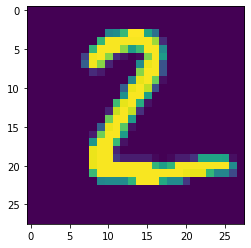

In [70]:
plt.imshow(test_data[1])
print('Actual Value:',test_labels[1])
print('Predicted value:',model.predict(test_data)[1].argmax())